# OpenCV
**Prerequisite:** Before starting this exercise, you should make yourself familiar with Python and some necessary library, e.g., numpy, matplotlib, etc. One good tutorial can be found [here](http://cs231n.github.io/python-numpy-tutorial/).

In this exercise you will:
* Learn about some basic image processing operations with OpenCV.
* Re-implement some basic image processing operations. This will help you to
 * Have better understand about the image processing operations.
 * Practice Python programming with Numpy library.

In [1]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def rel_error(out, correct_out):
    return np.sum(abs(out.astype(np.float32) - correct_out.astype(np.float32)) / 
                          (abs(out.astype(np.float32)) + abs(correct_out.astype(np.float32))))

In [3]:
# Checking OpenCV version
cv2.__version__

'3.4.2'

### NOTICE: 
In this lab exercise, we recommend to use `OpenCV 3.x` version, the documentations for OpenCV API can be found [here](https://docs.opencv.org/3.0-beta/index.html).

## Load images
Use the function [cv2.imread()](https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imread#cv2.imread) to read an image. The image should be in the working directory or a full path of image should be given. The function will return a numpy matrix.

Second argument is a flag which specifies the way image should be read.

 * cv2.IMREAD_COLOR - (1): Loads a color image. Any transparency (alpha channel) of image will be neglected. It is the **default flag**.
 * cv2.IMREAD_GRAYSCALE - (0): Loads image in grayscale mode
 * cv2.IMREAD_UNCHANGED - (-1): Loads image as such including alpha channel, if included.
 
**NOTE**: Color image loaded by OpenCV is in *Blue-Green-Red (BGR)* mode. But Matplotlib displays in *RGB* mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. We will discuss how to handle to display properly later.

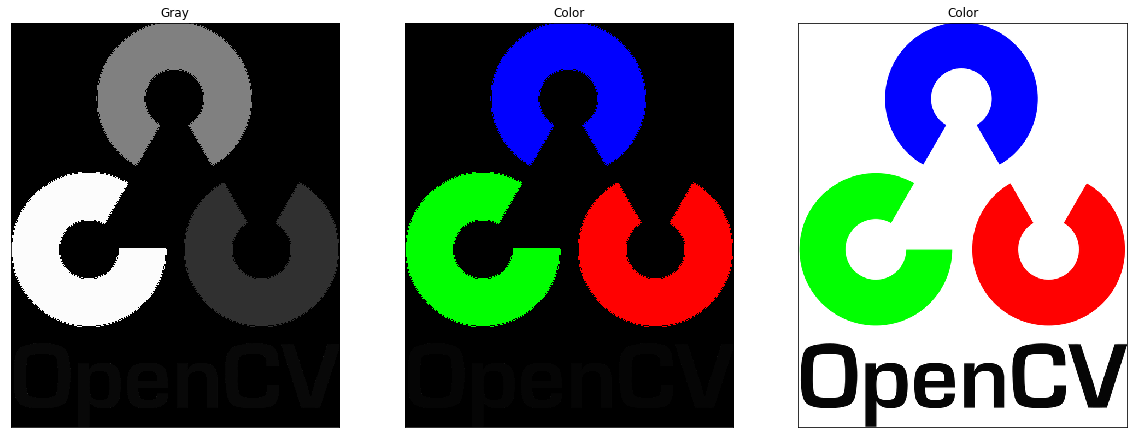

In [4]:
img_gray = cv2.imread('imgs/opencv_logo.png', 0)

plt.figure(figsize=(20,10))
plt.subplot(131),
plt.imshow(img_gray, cmap='gray')  # include cmap='gray' to display gray image
plt.title('Gray'),plt.xticks([]), plt.yticks([])

img_color1= cv2.imread('imgs/opencv_logo.png', 1)
plt.subplot(132),plt.imshow(img_color1),
plt.title('Color'),plt.xticks([]), plt.yticks([])

img_color2= cv2.imread('imgs/opencv_logo.png',-1)
plt.subplot(133),plt.imshow(img_color2),
plt.title('Color'),plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
[_.shape for _ in [img_gray, img_color1, img_color2]]

[(742, 602), (742, 602, 3), (742, 602, 4)]

**Question:** How many channels for each image: img_gray, img_color1, img_color2?

**Your answer**: 
* img_gray: 1
* img_color1: 3
* img_color2: 4

# Transformations
## Scaling
Resize image using the function [cv2.resize](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.resize#cv2.resize).

In [6]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('INTER_')]
print (flags)

['INTER_AREA', 'INTER_BITS', 'INTER_BITS2', 'INTER_CUBIC', 'INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_LINEAR_EXACT', 'INTER_MAX', 'INTER_NEAREST', 'INTER_TAB_SIZE', 'INTER_TAB_SIZE2']


In [7]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
res = cv2.resize(img,None,fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

################################################################################
# TO DO: Check the size of 'img' and 'res'?
################################################################################
pass
print(img.shape, res.shape)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

################################################################################
# TO DO: Resize 'img' so as to the smaller side is 500, while keeping image 
# ration unchanged.
################################################################################
pass
h, w, c = img.shape
print("Old aspect ratio:", h/w)
img = cv2.resize(img, (w * 500 // h, 500))
h, w, c = img.shape
print("Resized shape:", img.shape)
print("New aspect ratio:", h/w)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

(378, 428, 3) (756, 856, 3)
Old aspect ratio: 0.883177570093458
Resized shape: (500, 566, 3)
New aspect ratio: 0.8833922261484098


## Translation
Translation is the shifting of object's location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $M$ as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$
You can take make it into a Numpy array of type **np.float32** and pass it into [cv2.warpAffine()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine) function.

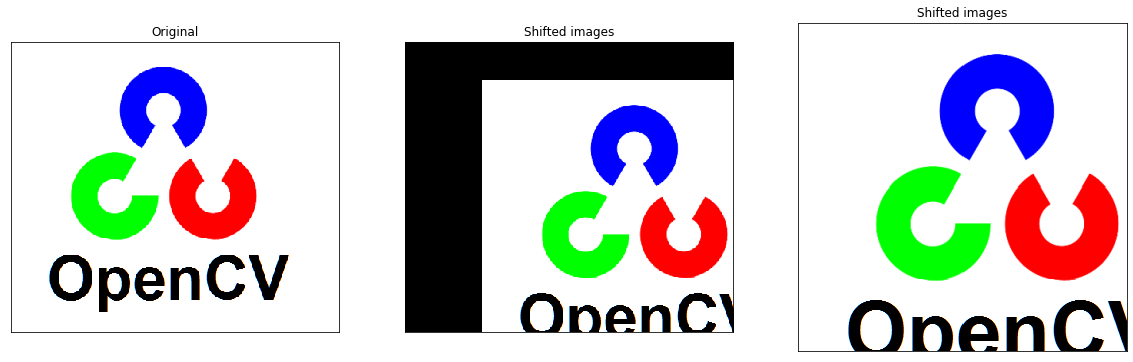

In [8]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
rows,cols,_ = img.shape
M = np.float32([[1,0,100],[0,1,50]]) # Shift right by 100 and down by 50
dst = cv2.warpAffine(img,M,(cols,rows))

################################################################################
# TO DO: Observed that the bottom right of 'dst' image is lost. Modifying the
# following codeline so as to the 'res' image is fully shown.
################################################################################
# res = cv2.warpAffine(dst,M,(cols,rows))
res = cv2.warpAffine(dst, np.float32([[1,0,-100], [0,1,-50]]), (cols-100, rows-50))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.show()

## Rotation
Calculates an affine matrix of 2D rotation using [cv2.getRotationMatrix2D()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getrotationmatrix2d#cv2.getRotationMatrix2D).
 * 1st argument: center
 * 2nd argument: angle (in degree)
 * 3rd argument: scale

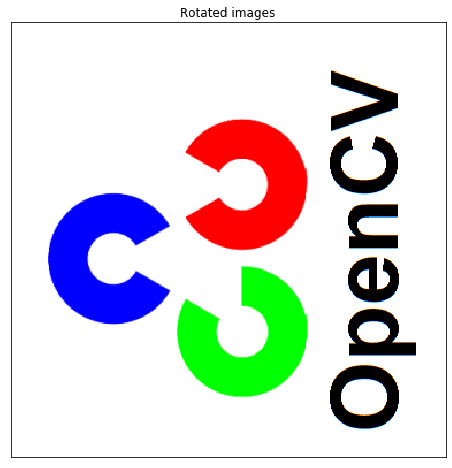

In [9]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
H,W,_ = img.shape
################################################################################
# TO DO: Run the code to observe the output image.
# Modifying the code below so as to the 'dst' image has no black padding.
################################################################################
M = cv2.getRotationMatrix2D((W/2,H/2),90,1)
dst = cv2.warpAffine(img,M,(W,H))
gap = abs(W - H)
dst = cv2.warpAffine(dst, np.float32([[1,0,-(gap//2)],[0,1,0]]), (H, H))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.imshow(dst),
plt.title('Rotated images'),plt.xticks([]), plt.yticks([])
plt.show()

# Changing color space - Grayscale
Grayscale values is converted from RGB values by a weighted sum of the R, G, and B components:

$$0.2989 \times R + 0.5870 \times G + 0.1140 \times B $$

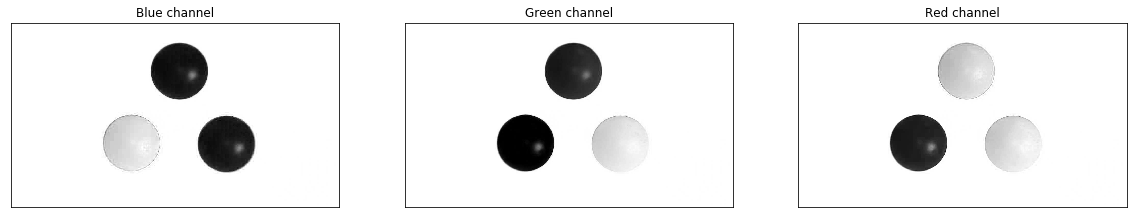

In [10]:
# Split channels
img = cv2.imread('imgs/balls.jpg', 1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img[:,:,0], cmap='gray'),
plt.title('Blue channel'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img[:,:,1], cmap='gray'),
plt.title('Green channel'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img[:,:,2], cmap='gray'),
plt.title('Red channel'),plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
def rgb2gray(img):
    """
    A implementation of the method that converts BGR image to grayscale image of 
    uint8 data type.
    """
    out = img
    ################################################################################
    # TO DO: Implement the method to convert BGR image to Grayscale image.         #
    # Hint: Remember to round and convert the values to nearest uint8 values.      #
    ################################################################################
    pass
    img = img.astype(np.float32)
    img = np.matmul(img, [0.1140, 0.5870, 0.2989])
    # img = np.clip(img, 0, 255)
    img = np.round(img)
    img = img.astype(np.uint8)
    out = img
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return out

Run the following code section to compare your implementation of the `rgb2gray` function with OpenCV built-in function [cv2.cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

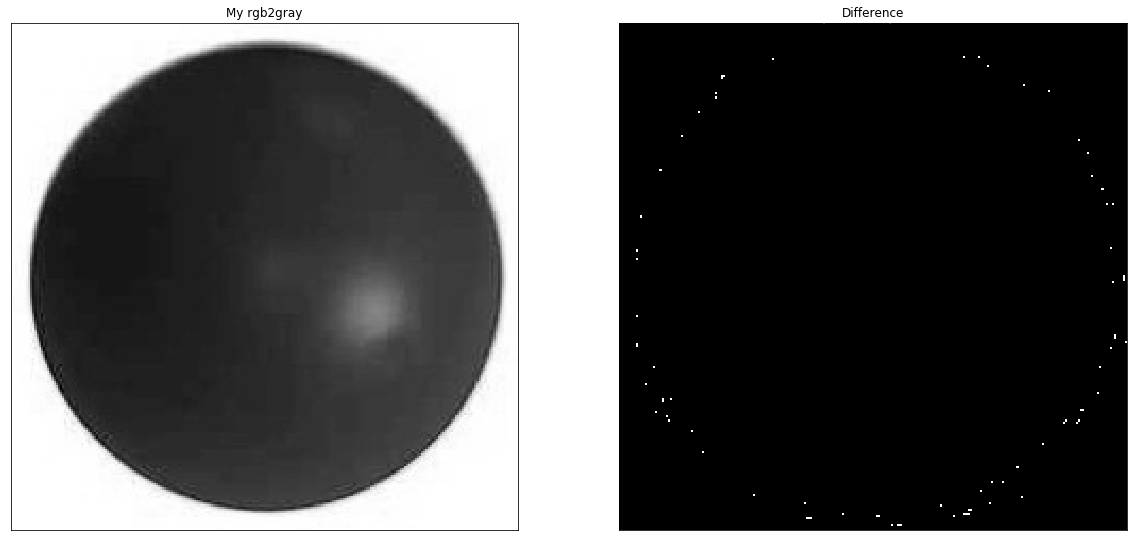

Testing rgb2gray
Number of difference pixel is 80


In [12]:
img = cv2.imread('imgs/ball_red.jpg', 1)
img_gray1 = rgb2gray(img)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_gray1, cmap='gray'),
plt.title('My rgb2gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gray1 - img_gray2, cmap='gray'),
plt.title('Difference'),plt.xticks([]), plt.yticks([])
plt.show()

# Check your output: count 
print('Testing rgb2gray')
print('Number of difference pixel is %d' % np.count_nonzero(img_gray1 - img_gray2))

**Question:** Does your implementation of `rgb2gray` function give the result that is exactly the same as OpenCV built-in function? Why?

**Your answer:** No there are a few pixels different. On the official documentation, the formula used is Y ← 0.299*R + 0.587*G + 0.114*B which is slightly different from the formula used here where the coefficient for R is 0.2989

# Changing color space - Detect object by color. 
By converting BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In this exercise, we will try to extract blue, red, and yellow colored objects. So here is the method:

 * Take each frame of the video
 * Convert from BGR to HSV color-space 
 * We threshold the HSV image for a range of blue color
 * Now extract the blue object alone, we can do whatever on that image we want.

In [13]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

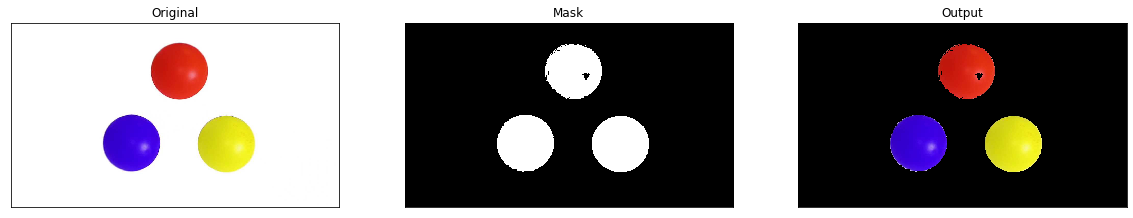

In [14]:
frame = cv2.imread('imgs/balls.jpg', 1)

# Convert BGR to RGB, now you will see the color of 'frame' image
# is displayed properly.
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

################################################################################
# TO DO: Implement masks for red and yellow balls. 
################################################################################
pass

def mask_image(frame, bgr_code):
  color = np.uint8([[bgr_code]])
  hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
  val = np.squeeze(hsv)[0]
  low = np.array([val-10,100,100])
  high = np.array([val+10,255,255])
  mask = cv2.inRange(cv2.cvtColor(frame, cv2.COLOR_RGB2HSV), low, high)
  return mask

mask_red = mask_image(frame, [0,0,255])
mask_yellow = mask_image(frame, [0,255,255])
mask = cv2.bitwise_or(mask, mask_red)
mask = cv2.bitwise_or(mask, mask_yellow)
res = cv2.bitwise_and(frame, frame, mask=mask)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(frame),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(mask, cmap='gray'),
plt.title('Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Output'),plt.xticks([]), plt.yticks([])
plt.show()

# 2D Convolution ( Image Filtering )

OpenCV provides a function, [cv2.filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#cv2.filter2D), to convolve a kernel with an image.
 
 

In [15]:
def convolution_naive(x, F, conv_param):
    """
    A naive implementation of a convolutional filter.
    
    The input consists of a gray scale image x (1 channel) with height H and width
    W. We convolve each input with filter F, which has height HH and width HH.
    
    Input:
    - x: Input data of shape (H, W)
    - F: Filter weights of shape (HH, WW)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.
    
    Return:
    - out: Output data, of shape (H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    """
    
    stride = conv_param['stride']
    pad = conv_param['pad']
    H, W = x.shape
    HH, WW = F.shape
    H_prime = int(1 + (H + 2 * pad - HH) / stride)
    W_prime = int(1 + (W + 2 * pad - WW) / stride)
    x_pad = np.lib.pad(x, ((pad, pad), (pad, pad)),\
                            'constant', constant_values=(0))
    out = np.zeros((H_prime, W_prime), dtype=x.dtype)
    print(x_pad.shape)

    
    #############################################################################
    # TODO: Implement the convolutional forward pass.                           #
    # Hint: Using 2 nested for-loop to calculate each pixel of the output image.#
    #############################################################################
    pass
    for i in range(0, H, stride):
      for j in range(0, W, stride):
        _slice = x_pad[i: i + HH, j:j + WW]
        assert _slice.shape == F.shape
        out[i][j] = np.sum(np.multiply(_slice, F))
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

Run the following code section to test your implementation of the `convolution_naive` function

In [16]:
x_shape = (5, 5)
F_shape = (3, 3)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
F = np.linspace(-0.2, 0.3, num=np.prod(F_shape)).reshape(F_shape)
conv_param = {'stride': 1, 'pad': 1}

out = convolution_naive(x, F, conv_param)
correct_out = np.array( [[ 0.0075,     0.030625,   0.0521875,  0.07375,    0.0475   ],
                         [ 0.114375,   0.1725,     0.18375,    0.195,      0.10875  ],
                         [ 0.1753125,  0.22875,    0.24,       0.25125,    0.1228125],
                         [ 0.23625,    0.285,      0.29625,    0.3075,     0.136875 ],
                         [ 0.0075,    -0.05375,   -0.0603125, -0.066875,  -0.1025   ]])
# print(correct_out.shape)
# print(out)

# Compare your output to ours; difference should be very small
print('Testing convolution_naive')
print('difference: ', rel_error(out, correct_out))

(7, 7)
Testing convolution_naive
difference:  0.0


In [17]:
# List of available BORDER effect
flags = [i for i in dir(cv2) if i.startswith('BORDER_')]
print(flags)

['BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_101', 'BORDER_REPLICATE', 'BORDER_TRANSPARENT', 'BORDER_WRAP']


## Averaging filter
This is done by convolving image with a normalized box filter. A $5\times 5$ normalized box filter would look like below:
$$K = \frac{1}{25} \begin{bmatrix} 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\1&1&1&1&1 \end{bmatrix}$$

Testing convolution_naive
difference:  0.00407813


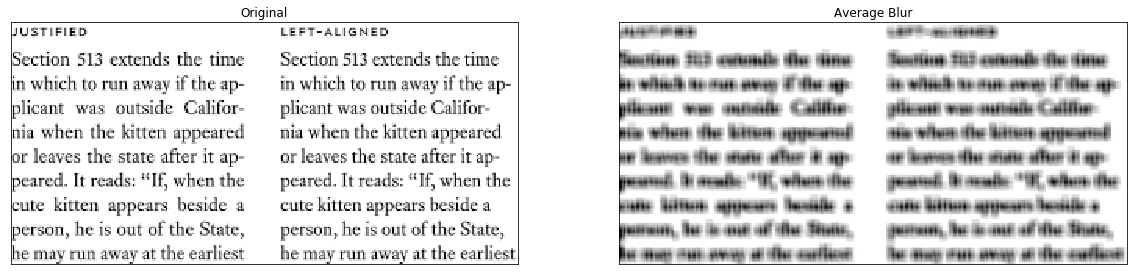

In [18]:
# Convert image data type from uint8 to float32.
img = cv2.imread('imgs/text.png', 1).astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel as K shown above.                                  #
################################################################################
pass
kernel = np.ones_like(kernel) / 25
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,kernel)

# The above codes can be replaced by the following code line.
blur = cv2.blur(img,(5,5))

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))


# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Average Blur'),plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Blurring
Here is the 1D Gaussian distribution:
$$G(x)=\frac{1}{\sigma\sqrt{2\pi} }\exp{\left(-\frac{x^2}{\sigma^2}\right)}$$

![1D Gaussian](imgs/Smoothing_Tutorial_theory_gaussian_0.jpg "1D Gaussian")

Similarly, we have 2D Gaussian distribution.
$$G(x,y)=\frac{1}{2\pi \sigma^2}\exp{\left(-\frac{x^2+y^2}{\sigma^2}\right)}$$
The nearest neighboring pixels have the most influence.
![2D Gaussian](imgs/gaussian_2d.gif "2D Gaussian")

Testing convolution_naive
difference:  0.0042338683


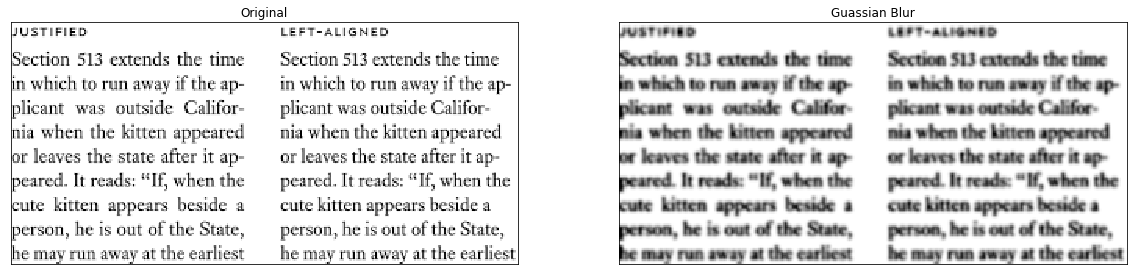

In [19]:
img = cv2.imread('imgs/text.png', 1).astype(np.float32)/255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_kernel_XY = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel, 'gaussian_kernel_XY', which approximates the 
# Gaussian function with sigma=1. 
# Hint: + You should NOT munually create the kernel.  
#       + Use the 'cv2.getGaussianKernel' function to create 1D Guassian kernel.
#       + Use the associative property of convolution to create 2D Gaussian. A
# useful reference: https://blogs.mathworks.com/steve/2006/10/04/separable-convolution/
################################################################################
kernel = np.ones_like(gaussian_kernel_XY)
gaussian = cv2.getGaussianKernel(5, sigma=1)
kernel = kernel * gaussian
kernel = kernel * np.transpose(gaussian)
gaussian_kernel_XY = kernel
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,gaussian_kernel_XY)

# The above codes can be replaced by the following code line.
blur = cv2.GaussianBlur(img,(5,5),1)

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))

# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Guassian Blur'),plt.xticks([]), plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the outputs of *a average filter* and *a Gaussian filter*? Which one is more preferable?

**Your answer:** After gaussian blur, the text is more legible compared to average filter

## Median Filter

Example: 
 * **Odd** number of elements: $X=[2, 5, 1, 0, 9]\to X_{sorted}=[0,1,2,5,9]\Rightarrow \text{median}=2$
 * **Even** number of elements: 
    * Option 1: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=1$
    * Option 2: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=(1+5)/2=3$

In [20]:
# Implement a function to find median value with `option 1`.
def findMedian(x):
    out = 0
    #############################################################################
    # TODO: Implement the function to find median value of array x.             #
    # NOTE: You should see that the `median' numpy built-in function is based   #
    # on option 2.
    #############################################################################
    pass
    x = np.sort(x, axis=None)
    if len(x) == 0:
      return 0
    mid = len(x) // 2
    if len(x) % 2 != 0:
      out = float(x[mid])
    else:
      out = np.mean(x[mid-1:mid+1])
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

In [21]:
print ('Numpy median: ', np.median([[5,1],[0,9]]))
print ('Numpy median: ', np.median([2,5,1,0,9]))
print ('findMedian: ', findMedian([[5,1],[0,9]]))
print ('findMedian: ', findMedian([2,5,1,0,9]))

Numpy median:  3.0
Numpy median:  2.0
findMedian:  3.0
findMedian:  2.0


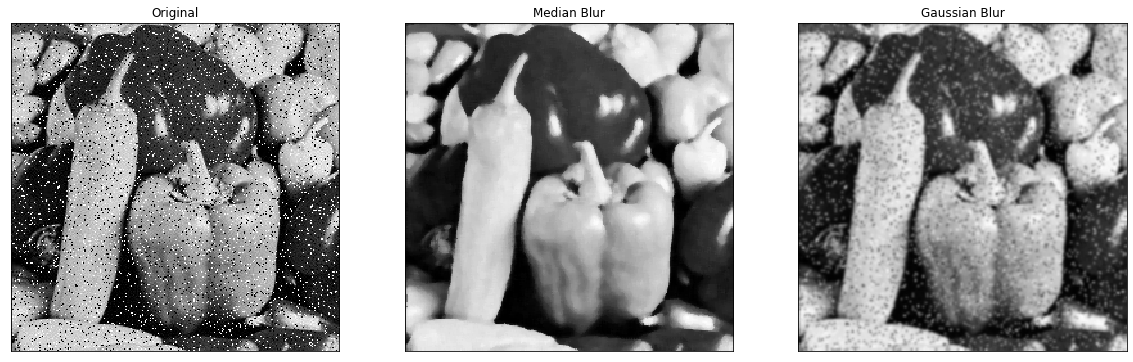

In [22]:
img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
median = cv2.medianBlur(img,5)
gau_blur = cv2.GaussianBlur(img,(5,5),1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(median, 'gray')
plt.title('Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gau_blur, 'gray')
plt.title('Gaussian Blur'),plt.xticks([]),plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the effectiveness of *a median filter* and *a Gaussian filter* for the example above? Explain why? 

**Your answer:** Median blur is more effective because it is less affected by the extreme values of the noise

In [23]:
def myMedianBlur(img, size):
    """
    A implementation of median blur filter.
    """
    out = img.copy()
    W,H = img.shape[0],img.shape[1]
    s = (size - 1)/2
    #############################################################################
    # TODO: Implement the median blur.                                          #
    # NOTE: Your implementation is NOT necessary to provide the identical       #
    # output as OpenCV built-in function. However, it should be visually very   # 
    # similar.                                                                  #
    #############################################################################
    
    pass
    img = np.pad(img, pad_width=((0,size-1),(0,size-1)), mode="edge")
    s = int(s)
    s = 1
    for i in range(0, W, s):
      for j in range(0, H, s):
        _slice = img[i:i+size, j:j+size]
        out[i,j] = np.median(_slice, axis=None)

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

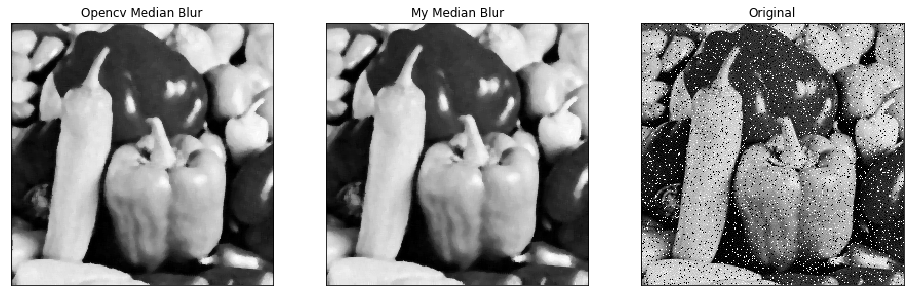

In [24]:
img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
mymedian = myMedianBlur(img,5)
median = cv2.medianBlur(img,5)

# Note that your implementation is NOT necessary to provide 
# the identical output as OpenCV built-in function. However,
# it should visually very similar.
plt.figure(figsize=(16,8))
plt.subplot(131),plt.imshow(median, 'gray')
plt.title('Opencv Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(mymedian, 'gray')
plt.title('My Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.show()

# Image gradient
For 1-D continuous function $f(x)$, the gradient is given as:
$$D_x[f(x)]=\frac{d}{dx}f(x)=\lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x},\quad\text{or}\quad \lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$$ 

For 1-D discrete function $f[n]$, the gradient becomes difference.
$$D_n[f[n]]=f[n+1]-f[n],\quad\text{ or }\quad\frac{f[n+1]-f[n-1]}{2}$$

The kernel to find gradient in 1-D discrete function is $[1, 0, -1]$. 

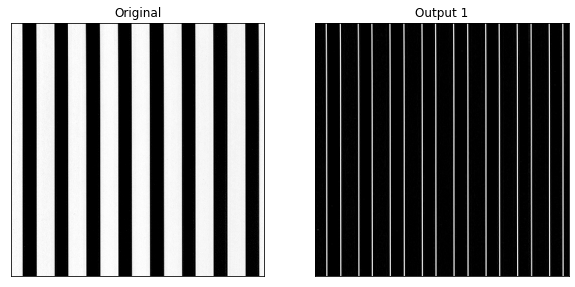

In [25]:
img = cv2.imread('imgs/banded_vertical.jpg', 0).astype(np.float32) 

#############################################################################
# TODO: Create a 3x3 kernel, Kx, to find the gradient in x-axis of an image.#
#############################################################################
pass
Kx = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1],
])
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dstx = cv2.filter2D(img,-1, Kx)

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dstx), cmap='gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.show()

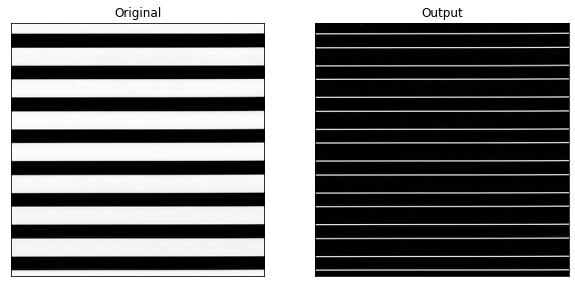

In [26]:
img = cv2.imread('imgs/banded_horizontal.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Create a 3x3 kernel, Ky, to find the gradient in y-axis of an image.#
#############################################################################
pass
Ky = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1],
])
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dsty = cv2.filter2D(img,-1,Ky)


plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dsty), 'gray')
plt.title('Output'),plt.xticks([]),plt.yticks([])
plt.show()

**Question:** What do the kernel `Kx` and `Ky` do in *image processing*?

**Answer:** It shows the change in color intensity in the x and y direction respectively

### Two directions:
* Find the difference: in the two directions: 
$$g_x[m,n]=f[m+1,n]-f[m-1,n]$$

$$g_y[m,n]=f[m,n+1]-f[m,n-1]$$

* Find the magnitude and direction of the gradient vector: 
$$\|g[m,n]\|=\sqrt{g^2_x[m,n]+g^2_y[m,n]}$$

$$\measuredangle g[m,n]=\tan^{-1}\left(\frac{g_y[m,n]}{g_x[m,n]}\right)$$

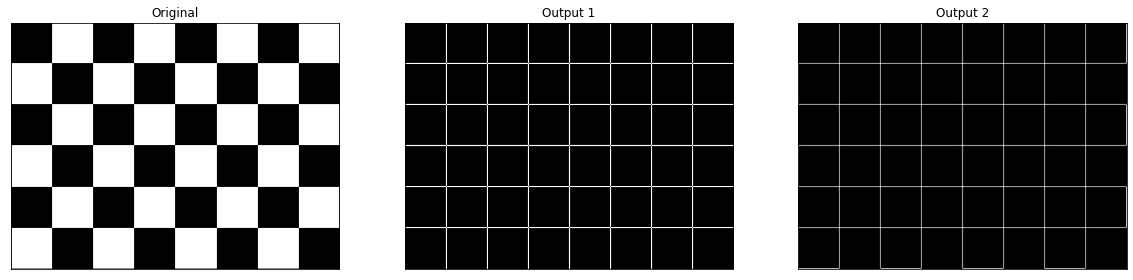

In [27]:
img = cv2.imread('imgs/chequered.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Using the theory provided above, compute the magnitude of 2         # 
# direction image gradient.                                                 #
#############################################################################
pass
dstx = cv2.filter2D(img,-1,Kx)
dsty = cv2.filter2D(img,-1,Ky)
dst1 = np.sqrt(np.add(np.square(dstx), np.square(dsty)))

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

# You can achieve a similar (NOT identical) output with the following code line.
K = np.array([[0, 1,0],
              [1,-4,1],
              [0, 1,0]], dtype=np.float32)
dst2 = cv2.filter2D(img,-1,K)


plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(np.abs(dst1), 'gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(np.abs(dst2), 'gray')
plt.title('Output 2'),plt.xticks([]),plt.yticks([])
plt.show()

# Histogram 
 * It is a graphical representation of the intensity distribution of an image.
 * It quantifies the number of pixels for each intensity value considered.

## Histogram equilization
 * Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spreaded over the whole range.
 * To accomplish the equalization effect, the remapping should be the cumulative distribution function (cdf) (more details, refer to Learning OpenCV). For the histogram H(i), its cumulative distribution $H^{'}(i)$ is:

$$H^{'}(i) = \sum_{0 \le j < i} H(j)$$

 * To use this as a remapping function, we have to normalize $H^{'}(i)$ such that the maximum value is 255 ( or the maximum value for the intensity of the image ). From the example above, the cumulative function is:

![cumulative distribution function](imgs/Histogram_Equalization_Theory_2.jpg "Cumulative Distribution Function (cdf)")

* Finally, we use a simple remapping procedure to obtain the intensity values of the equalized image:

$$equalized( x, y ) = H^{'}( src(x,y) )$$


![Histogram Equalization](imgs/histEqualize.png "Histogram Equalization")

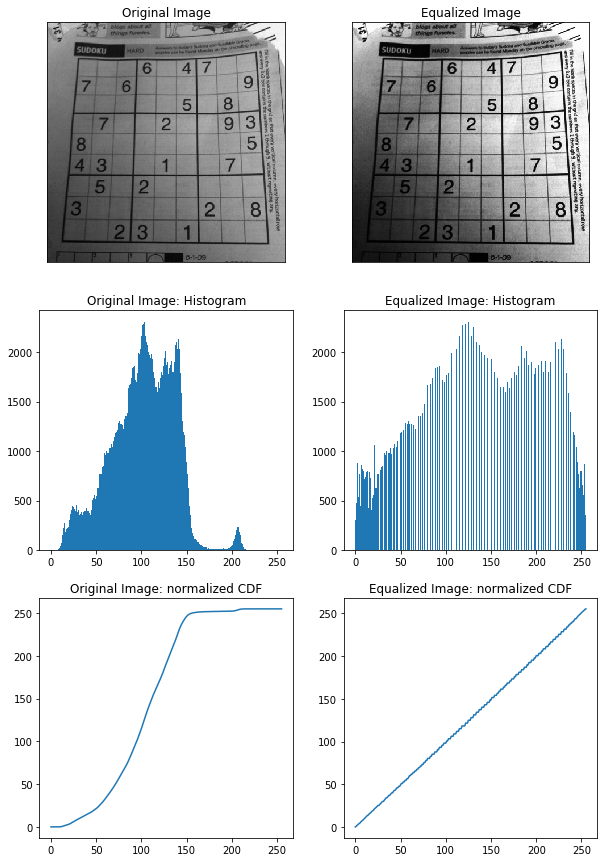

In [28]:
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_eq = cv2.equalizeHist(img)

hist = np.histogram(img, bins=256, range=(0.0, 255.0))
hist_eq = np.histogram(img_eq, bins=256, range=(0.0, 255.0))

plt.figure(figsize=(10,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(322),plt.imshow(img_eq, cmap='gray'),plt.title('Equalized Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(323),plt.hist(img.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Original Image: Histogram')
plt.subplot(324),plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Equalized Image: Histogram')
plt.subplot(325),plt.plot(range(0,256),np.cumsum(hist[0])*255/(W*H)),plt.title('Original Image: normalized CDF')
plt.subplot(326),plt.plot(range(0,256),np.cumsum(hist_eq[0])*255/(W*H)),plt.title('Equalized Image: normalized CDF')
plt.show()

**QUIZ:** Is histogram equalization reversible?

**Your answer:** No because it uses the floor operation

In [29]:
def myEqualizeHist(img):
    """
    A implementation of a histogram equalization for image of `uint8` data type.
    """
    out = img
    #############################################################################
    # TODO: Implement the histogram equalization function.                      #
    #############################################################################
    pass
    out = np.copy(img)
    vals, counts = np.unique(img, return_counts=True)
    idxs_sort = np.argsort(vals)
    vals = vals[idxs_sort]
    counts = counts[idxs_sort]
    acc = np.cumsum(counts)
    assert np.max(acc) == img.size  # num_elements

    cdf = (acc - np.min(acc)) / (np.max(acc) - np.min(acc))
    assert cdf.shape == vals.shape
    mapping = {vals[i]:cdf[i] for i in range(len(cdf))}

    levels = 256
    h, w = img.shape
    for i in range(h):
      for j in range(w):
        out[i,j] = np.floor((levels - 1) * mapping[img[i,j]])
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

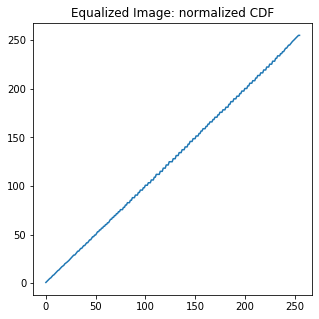

In [30]:
# Verify the correctness of your implementation by plotting the 
# normalized CDF of equalized image
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_myeq = myEqualizeHist(img)

# Your implementation may NOT need to return an image that is 
# exactly the same as the one OpenCV build-in function does. 
# However, the normalized CDF should make sense.
hist_myeq = np.histogram(img_myeq, bins=256, range=(0.0, 255.0))
plt.figure(figsize=(5,5))
plt.plot(range(0,256),np.cumsum(hist_myeq[0])*255/(W*H))
plt.title('Equalized Image: normalized CDF')
plt.show()

# Threshold
## Simple Threshold
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is [cv2.threshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.threshold). 

In [31]:
# Get list of available flags for thresholding styles
flags = [i for i in dir(cv2) if i.startswith('THRESH_')]
print(flags)

['THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_MASK', 'THRESH_OTSU', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRIANGLE', 'THRESH_TRUNC']


## Adaptive Method

It decides how thresholding value is calculated. The function used is [cv2.adaptiveThreshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.adaptivethreshold#cv2.adaptiveThreshold).

 * cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
 * cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

C= 2
C= 1
C= 3


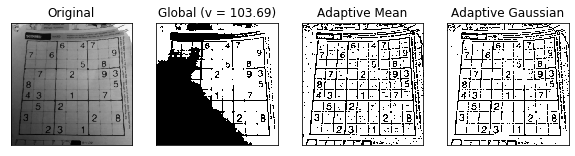

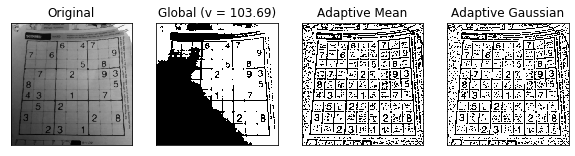

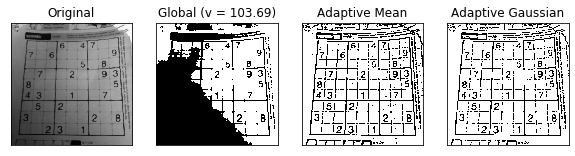

In [32]:
def experiment_threshold(C=2):
  print("C=", C)
  img = cv2.imread('imgs/sudoku-original.jpg',0)
  img = cv2.medianBlur(img,5)
  img_mean = np.mean(img)

  # C = 2
  ret,th1 = cv2.threshold(img,img_mean,255,cv2.THRESH_BINARY)
  th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
              cv2.THRESH_BINARY,11,C)

  th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,11,C)

  #############################################################################
  # TODO:                                                             #
  # Trying several value of constant C and observing how the output           #
  # thresholded images change.                                             #
  #############################################################################
  pass
  # Function is called with different values of C below
  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################

  titles = ['Original', 'Global (v = {:.2f})'.format(img_mean),
          'Adaptive Mean', 'Adaptive Gaussian']
  images = [img, th1, th2, th3]

  fig = plt.figure(figsize=(10, 10))
  for i in range(4):
      # plt.subplot(2,2,i+1)
      plt.subplot(1,4,i+1)
      plt.imshow(images[i],'gray')
      plt.title(titles[i])
      plt.xticks([])
      plt.yticks([])
  plt.show()

experiment_threshold(C=2)
experiment_threshold(C=1)
experiment_threshold(C=3)